<a href="https://colab.research.google.com/github/tkkkkkz/Data_Science_Projects/blob/main/PM2.5_Sensor_Network/Two_Sensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime, date
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from scipy import stats

In [ ]:
from datetime import date

### Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
link_two = '/content/gdrive/My Drive/Colab Notebooks/indoor double sensors 2017 to Sept 8 2021.csv'
link_one_1 = '/content/gdrive/My Drive/Colab Notebooks/indoor single sensors 2017-June 25 2021.csv'
link_one_2 = '/content/gdrive/My Drive/Colab Notebooks/indoor single sensors July-Sept 8 2021.csv'

In [ ]:
 two = pd.read_csv(link_two)
 one_1 = pd.read_csv(link_one_1)
 one_2 = pd.read_csv(link_one_2)

In [ ]:
two['datetime_new'] = (pd.to_timedelta(two['datetime'], unit='D') + pd.to_datetime('1899-12-30')).dt.round('h')
one_1['datetime_new'] = (pd.to_timedelta(one_1['created_at'], unit='D') + pd.to_datetime('1899-12-30')).dt.round('h')
one_2['datetime_new'] = (pd.to_timedelta(one_2['datetime'], unit='D') + pd.to_datetime('1899-12-30')).dt.round('h')

In [ ]:
two['date'] = two['datetime_new'].dt.date
two['time'] = two['datetime_new'].dt.time

one_1['date'] = one_1['datetime_new'].dt.date
one_1['time'] = one_1['datetime_new'].dt.time

one_2['date'] = one_2['datetime_new'].dt.date
one_2['time'] = one_2['datetime_new'].dt.time

In [ ]:
one_1.rename(columns={'created_at':'datetime'}, inplace=True)
one_1_before_july = one_1[one_1['datetime_new']< datetime.strptime('2021-07-01', '%Y-%m-%d')]

In [ ]:
one_all = pd.concat([one_1_before_july, one_2])
one_all.rename(columns={'PM2.5_CF3_A':'PM2.5_A'}, inplace=True)

In [ ]:
two.rename(columns={'Mean PM2.5 CF3':'PM2.5'}, inplace=True)

The common time range in two datasets of PAI sensors and PAII sensors is from 05/08/2017 to 09/03/2021. I will only consider the times points within this range in the following analysis.

In [ ]:
one = one_all[(one_all['datetime_new']< datetime.strptime('2021-09-03', '%Y-%m-%d')) & (one_all['datetime_new']>= datetime.strptime('2017-05-08', '%Y-%m-%d'))]

In [ ]:
two = two[(two['datetime_new']<= datetime.strptime('2021-09-02', '%Y-%m-%d')) & (two['datetime_new']>= datetime.strptime('2017-05-08', '%Y-%m-%d'))]

### Sensors Distribution

Before diving into a comparison, I will first look into the summary statistics of sensors. I found that,
* The number of single sensors is  3526 , which covered 99 counties in total.
* The number of single sensors in  California  is  3299 .
* The number of single sensors in  Oregon  is  81 .
* The number of single sensors in  Washington  is  146 .
<br><br>
* The number of double sensors is  1178 , which covered only 67 counties in total.
* The number of double sensors in  California  is  1030 .
* The number of double sensors in  Oregon  is  78 .
* The number of double sensors in  Washington  is  70 .



In [ ]:
cnt_one = one['sensor_index'].nunique()
print('The number of single sensors is ', cnt_one, '.')

for i in ['California', 'Oregon', 'Washington']:
  cnt = one[one['State']==i]['sensor_index'].nunique()
  print('The number of single sensors in ', i, ' is ', cnt, '.')

The number of single sensors is  3526 .
The number of single sensors in  California  is  3299 .
The number of single sensors in  Oregon  is  81 .
The number of single sensors in  Washington  is  146 .


In [ ]:
cnt_two = two['sensor_index'].nunique()
print('The number of double sensors is ', cnt_two, '.')

for i in ['California', 'Oregon', 'Washington']:
  cnt = two[two['State']==i]['sensor_index'].nunique()
  print('The number of double sensors in ', i, ' is ', cnt, '.')

The number of double sensors is  1178 .
The number of double sensors in  California  is  1030 .
The number of double sensors in  Oregon  is  78 .
The number of double sensors in  Washington  is  70 .


In [ ]:
one_sensor_dis = one.groupby(['State', 'County']).nunique()['sensor_index']
two_sensor_dis = two.groupby(['State', 'County']).nunique()['sensor_index']

In [ ]:
one_sensor_dis

State       County          
California  Alameda County      550
            Alpine County         1
            Amador County         1
            Butte County         12
            Calaveras County      4
                               ... 
Washington  Thurston County       2
            Whatcom Coun          1
            Whatcom County        2
            Yakima Count          1
            Yakima County         1
Name: sensor_index, Length: 99, dtype: int64

In [ ]:
two_sensor_dis

State       County             
California  Alameda County         174
            Amador County            3
            Calaveras County         1
            Contra Costa County     55
            El Dorado County         9
                                  ... 
Washington  Snohomish County         4
            Spokane County           2
            Thurston County          3
            Whatcom County           1
            Yakima County            1
Name: sensor_index, Length: 67, dtype: int64

In terms of the location distributions of sensors, I plotted them in scatterplots in the below figure. The figures covered the ranges of longitudes and latitudes of California, Oregon and Washington. 
<br><br>
The three clusters you could find on the figure is supposed to be the greater Los Angeles area, the bay area, and the greater Seattle area. (There is a way to put a map on the background, but I don't have time to learn it for now. I will figure it out after this job hunting.)

In [ ]:
one_loc_dis = one.groupby(['longitude', 'latitude']).nunique()['sensor_index']
two_loc_dis = two.groupby(['longitude', 'latitude']).nunique()['sensor_index']

In [ ]:
one_loc_dis = one_loc_dis.reset_index()
two_loc_dis = two_loc_dis.reset_index()

Text(0.5, 1.0, 'Double Sensor Distributions')

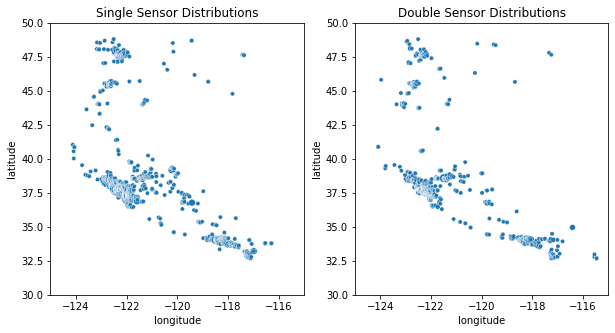

In [ ]:
figs, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(data=one_loc_dis, x='longitude', y='latitude', size='sensor_index',ax=axes[0],legend=False)
sns.scatterplot(data=two_loc_dis, x='longitude', y='latitude', size='sensor_index',ax=axes[1],legend=False)

axes[0].set_xlim(-125, -115)
axes[1].set_xlim(-125, -115)
axes[0].set_ylim(30, 50)
axes[1].set_ylim(30, 50)
axes[0].set_title(label='Single Sensor Distributions')
axes[1].set_title(label='Double Sensor Distributions')

In [ ]:
one_sensor_cnt = one.groupby('date').nunique()['sensor_index']
two_sensor_cnt = two.groupby('date').nunique()['sensor_index']

Since we will want to compare daily PM2.5 between two type of sensors finally, so I first calculate that, for each day, how many sensors were included.<br><br>
As you can see in the below figure, In year 2017, the counts of PA-I and PA-II were very low. There were only one sensor of each type for most of the time.
<br><br>
There is an improvement in 2018, but an obvious increase in sensor counts was happened in Nov 2018. The number of PA-I was increased to more than 100, while the number of PA-II was increased to more than 50.
<br><br>
In Oct 2019, the count of PA-I sensors was further increased to ~400, while that of PA-II slowly increased to ~200.
<br><br>
In Aug 2020, both of the counts were significantly increased, as the count of PA-I can reach to ~2500 in maximum and the count of PA-II was ~800.
<br><br>
Since we want to use a large number of sensors to cover differences among various households and to make PA-I and PA-II comparable, I suggest to use at least 200 as a count cutoff. It means we will only use the data from Oct 2019 for the comparison. Any suggestions on using a mathmatical methods to calculate a count cutoff?

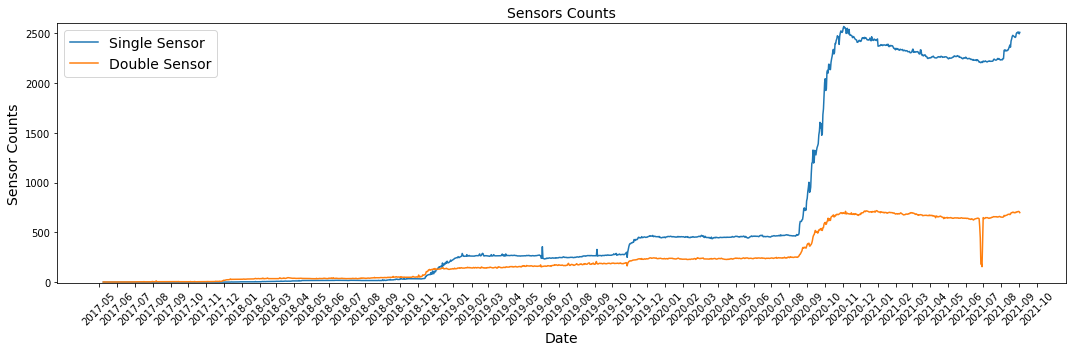

In [ ]:
figs, axes = plt.subplots(figsize=(15, 5))

sns.lineplot(one_sensor_cnt.index, one_sensor_cnt.values, label='Single Sensor')
sns.lineplot(two_sensor_cnt.index, two_sensor_cnt.values, label='Double Sensor')

axes.set_ylim(-10, 2600)

date_period = pd.date_range('2017-05-01', '2021-10-01',freq=pd.offsets.MonthBegin(1))
date_range = [i.to_period("M") for i in date_period]

axes.set_xticks(date_period)
axes.set_xticklabels(date_range, rotation=45)
axes.set_title('Sensors Counts', fontsize=14)
axes.set_xlabel('Date', fontsize=14)
axes.set_ylabel('Sensor Counts', fontsize=14)

plt.legend(fontsize=14, loc='upper left')
plt.tight_layout()

### Weekly Trends

For PA-I and PA-II comparisons, I first compare their weekly trends. As the below figure shows, the comparison in 2017 seems random, which is mostly because the very low number of sensors involved (only one sensor of each type).

For figures in 2019, 2020 and 2021, the difference between PA-I and PA-II became more constant and stable, when a larger number of sensors involved.

In [ ]:
one['weekofyear'] = one['datetime_new'].dt.weekofyear
one['year'] = one['datetime_new'].dt.year

two['weekofyear'] = two['datetime_new'].dt.weekofyear
two['year'] = two['datetime_new'].dt.year

In [ ]:
one_weekly = one.groupby(['year','weekofyear']).agg({'PM2.5_A':'mean','sensor_index':'nunique'})
two_weekly = two.groupby(['year','weekofyear']).agg({'PM2.5':'mean','PM2.5_CF3_A':'mean','sensor_index':'nunique'})

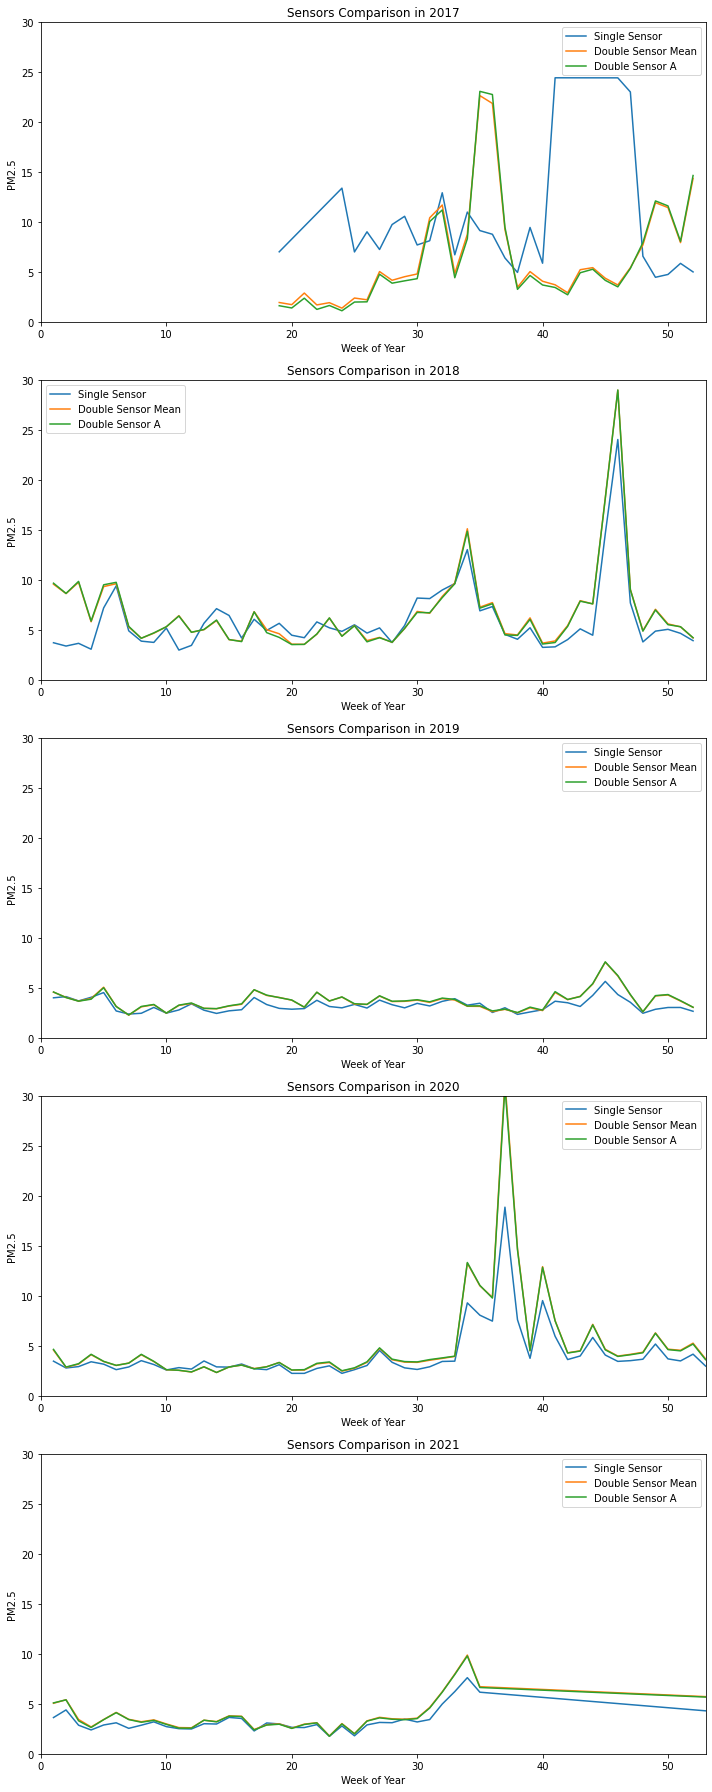

In [ ]:
figs, axes = plt.subplots(5,1,figsize=(10, 25))

for i in range(2017, 2022):
  sns.lineplot(data=one_weekly.loc[i],x=one_weekly.loc[i].index,y='PM2.5_A',label='Single Sensor', ax=axes[i-2017])
  sns.lineplot(data=two_weekly.loc[i],x=two_weekly.loc[i].index, y='PM2.5',label='Double Sensor Mean', ax=axes[i-2017])
  sns.lineplot(data=two_weekly.loc[i],x=two_weekly.loc[i].index, y='PM2.5_CF3_A',label='Double Sensor A', ax=axes[i-2017])
  
  axes[i-2017].set_xlabel('Week of Year')
  axes[i-2017].set_ylabel('PM2.5')
  axes[i-2017].set_ylim(0, 30)
  axes[i-2017].set_xlim(0, 53)
  
  ave_single = int(one_weekly.loc[i]['sensor_index'].mean())
  ave_double = int(two_weekly.loc[i]['sensor_index'].mean())
  label = str(ave_single) + 'signle sensors ' + str(ave_double) + ' double sensors on average'
  axes[i-2017].text(0.10, 0.95, '', transform=axes[i-2017].transAxes, fontsize=14, va='top')

  # ax2 = axes[i-2017].twinx()
  # sns.lineplot(data=one_weekly.loc[i],x=one_weekly.loc[i].index,y='sensor_index',label='Single Sensor Counts', ax=ax2)
  # sns.lineplot(data=two_weekly.loc[i],x=two_weekly.loc[i].index,y='sensor_index',label='Double Sensor Counts', ax=ax2)

  axes[i-2017].set_title('Sensors Comparison in ' + str(i))

plt.tight_layout()

### Daily Trends

The daily PM2.5 comparison between two sensors are showed below.

In [ ]:
one_daily = one.groupby(['year','date']).agg({'PM2.5_A':'mean','sensor_index':'nunique'})
two_daily = two.groupby(['year','date']).agg({'PM2.5':'mean','PM2.5_CF3_A':'mean','sensor_index':'nunique'})

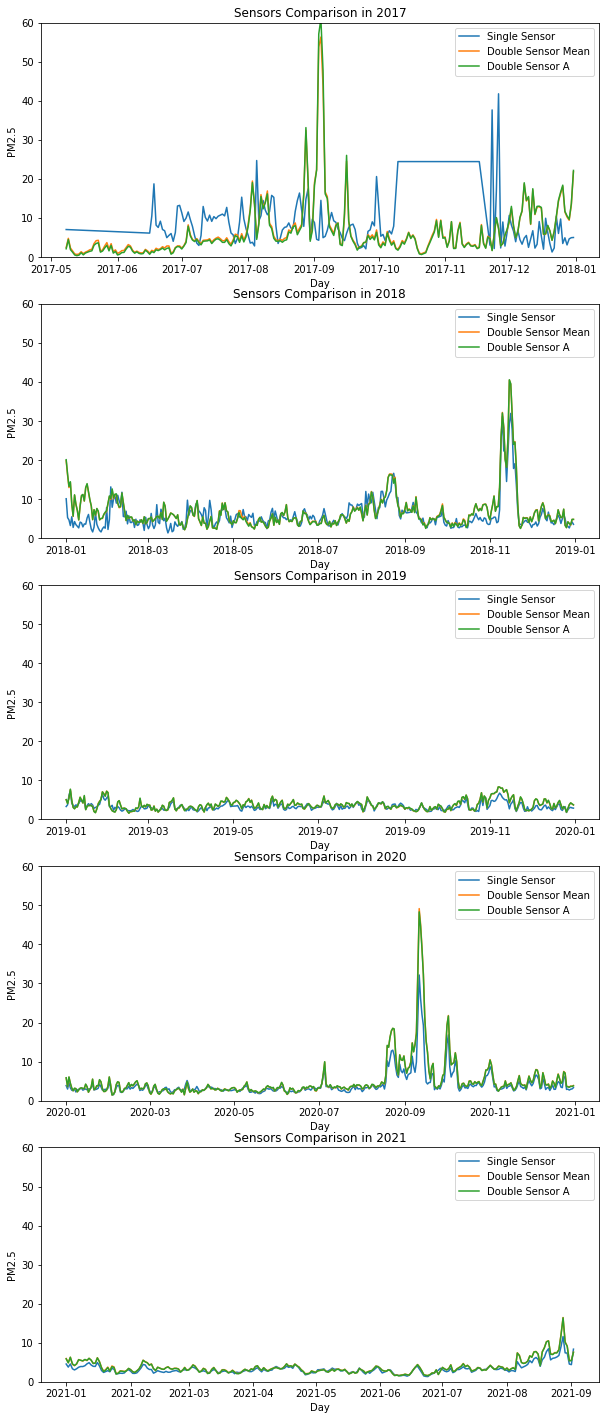

In [ ]:
figs, axes = plt.subplots(5,1,figsize=(10, 25))

for i in range(2017, 2022):
  sns.lineplot(data=one_daily.loc[i],x=one_daily.loc[i].index, y='PM2.5_A',label='Single Sensor', ax=axes[i-2017])
  sns.lineplot(data=two_daily.loc[i],x=two_daily.loc[i].index, y='PM2.5',label='Double Sensor Mean', ax=axes[i-2017])
  sns.lineplot(data=two_daily.loc[i],x=two_daily.loc[i].index, y='PM2.5_CF3_A',label='Double Sensor A', ax=axes[i-2017])
  
  axes[i-2017].set_xlabel('Day')
  axes[i-2017].set_ylabel('PM2.5')
  axes[i-2017].set_ylim(0, 60)
  # axes[i-2017].set_xlim()
  
  # ave_single = int(one_daily.loc[i]['sensor_index'].mean())
  # ave_double = int(two_daily.loc[i]['sensor_index'].mean())
  # label = str(ave_single) + 'signle sensors ' + str(ave_double) + ' double sensors on average'
  # axes[i-2017].text(0.10, 0.95, '', transform=axes[i-2017].transAxes, fontsize=14, va='top')

  # ax2 = axes[i-2017].twinx()
  # sns.lineplot(data=one_weekly.loc[i],x=one_weekly.loc[i].index,y='sensor_index',label='Single Sensor Counts', ax=ax2)
  # sns.lineplot(data=two_weekly.loc[i],x=two_weekly.loc[i].index,y='sensor_index',label='Double Sensor Counts', ax=ax2)

  axes[i-2017].set_title('Sensors Comparison in ' + str(i))

#plt.tight_layout()

### Two_one_ratio Daily Average Comparison

In [ ]:
one_two_merge = one_daily.merge(two_daily, how='outer', on=['year', 'date'], suffixes=('_one', '_two'))
one_two_merge.fillna(0)

PM2.5_A  sensor_index_one  ...  PM2.5_CF3_A  sensor_index_two
year date                                     ...                               
2017 2017-05-08   7.060934               1.0  ...     2.135110               2.0
     2017-06-16   6.147564               1.0  ...     0.720714               3.0
     2017-06-17  10.517541               1.0  ...     1.431784               3.0
     2017-06-18  18.762162               1.0  ...     1.153200               3.0
     2017-06-19   8.195097               1.0  ...     1.871614               3.0
...                    ...               ...  ...          ...               ...
     2017-11-16   0.000000               0.0  ...     2.172907               7.0
     2017-11-18   0.000000               0.0  ...     8.095344              10.0
     2017-11-19   0.000000               0.0  ...     3.427539               7.0
     2017-11-20   0.000000               0.0  ...     2.261857               8.0
     2017-11-21   0.000000               0.0  ...     5.146888               9.0

[1579 rows x 5 columns]

In [ ]:
one_two_merge['two_one_ratio'] = (one_two_merge['PM2.5_A']/one_two_merge['PM2.5']).round(2)
one_two_merge['two_one_A_ratio'] = (one_two_merge['PM2.5_A']/one_two_merge['PM2.5_CF3_A']).round(2)

In [ ]:
one_two_merge['two_one_ratio'].describe().round(2)

count    1498.00
mean        1.01
std         0.87
min         0.08
25%         0.78
50%         0.88
75%         1.04
max        21.65
Name: two_one_ratio, dtype: float64

For double_to_single ratio, there are 1498 daily average comparisons. the range is 0.08 to 21.65. The mean ratio is 1.01 (SD 0.87). The 25%, 50%, 75% percentiles are 0.78, 0.88, and 1.04, respectively. 

The below figure shows that the ratio increases with an increase of PM2.5 values. 

In [ ]:
bins = np.linspace(0, 45, 10)
ratio_mean = []
ratio_median = []
bin_space = []
n = []
for i in range(len(bins)-1):
  #print(bins[i:i+2])
  x = bins[i:i+2][0]
  y = bins[i:i+2][1]
  bin_space.append((x, y))
  ratio_mean.append(one_two_merge[(one_two_merge['PM2.5_A']<=y) & (one_two_merge['PM2.5_A']>x)]['two_one_ratio'].mean())
  ratio_median.append(one_two_merge[(one_two_merge['PM2.5_A']<=y) & (one_two_merge['PM2.5_A']>x)]['two_one_ratio'].median())
  n.append(one_two_merge[(one_two_merge['PM2.5_A']<=y) & (one_two_merge['PM2.5_A']>x)]['two_one_ratio'].count())

In [ ]:
pd.DataFrame({'PM2.5_ranges':bin_space, 'mean_ratio':ratio_mean, 'median_ratio':ratio_median, 'n':n})

,PM2.5_ranges,mean_ratio,median_ratio,n
0,"(0.0, 5.0)",0.884165,0.880,1102
1,"(5.0, 10.0)",1.139773,0.930,308
2,"(10.0, 15.0)",1.542807,1.130,57
3,"(15.0, 20.0)",2.308462,1.140,13
4,"(20.0, 25.0)",3.450000,1.035,10
5,"(25.0, 30.0)",0.730000,0.730,3
6,"(30.0, 35.0)",0.810000,0.810,3
7,"(35.0, 40.0)",21.650000,21.650,1
8,"(40.0, 45.0)",5.670000,5.670,1


One Line 7, the ratio of 21.65 is an outlier. That ratio was derived from the data on '2017-11-23'. On that day, there are only one single sensor, but four double sensors. That high ratio can be resulted by a polluted indoor activity in the signle sensor site. 

In [ ]:
print('There are ', one[one['date'] == date(2017,11,23)]['sensor_index'].nunique(), ' single sensor(s) on 2017-11-23')
print('There are ', two[two['date'] == date(2017,11,23)]['sensor_index'].nunique(), ' double sensor(s) on 2017-11-23')

There are  1  single sensor(s) on 2017-11-23
There are  7  double sensor(s) on 2017-11-23


In [ ]:
one[one['date'] == date(2017,11,23)]['PM2.5_A'].describe()

count     24.000000
mean      37.692678
std       53.952321
min        1.086602
25%        1.870479
50%       18.125587
75%       36.825620
max      187.273106
Name: PM2.5_A, dtype: float64

In [ ]:
two[two['date'] == date(2017,11,23)]['PM2.5'].describe()

count    168.000000
mean       1.740783
std        1.555530
min        0.045715
25%        0.463508
50%        1.136021
75%        2.716667
max        9.554806
Name: PM2.5, dtype: float64

From the above table, it can be found that, in lower PM2.5 ranges from 0 to 20, the two_to_one ratio increases with the increase of PM2.5 values. When the PM2.5 is higher than 20, there is no consistent trends. One possible reason is that the data points are too few. Therefore, comparing hourly averages might be a good idea. However, daily average could also introduce a lot of biases.

In [ ]:
one_two_merge.to_csv('one_two_merge.csv')

In [ ]:
one_two_merge['two_one_ratio'] = one_two_merge['two_one_ratio'].fillna(0)

No handles with labels found to put in legend.


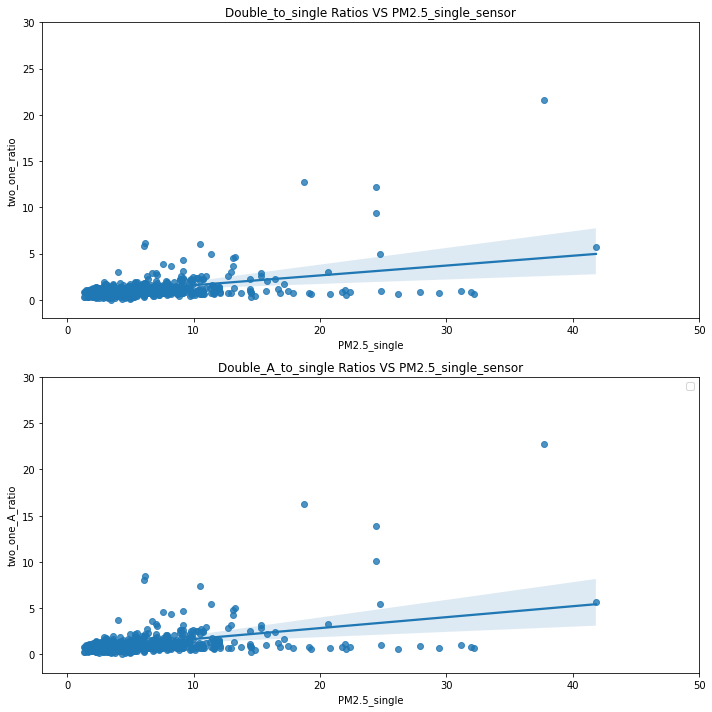

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
slope, intercept, r_value, pv, se = stats.linregress(one_two_merge['PM2.5_A'],one_two_merge['two_one_ratio'])
sns.regplot(data=one_two_merge, x='PM2.5_A', y='two_one_ratio', ax=axes[0], label="y={0:.1f}x+{1:.1f}".format(slope, intercept))
sns.regplot(data=one_two_merge, x='PM2.5_A', y='two_one_A_ratio', ax=axes[1])

axes[0].set_title('Double_to_single Ratios VS PM2.5_single_sensor')
axes[0].set_xlim(-2, 50)
axes[0].set_ylim(-2, 30)
axes[0].set_xlabel('PM2.5_single')

axes[1].set_title('Double_A_to_single Ratios VS PM2.5_single_sensor')
axes[1].set_xlim(-2, 50)
axes[1].set_ylim(-2, 30)
axes[1].set_xlabel('PM2.5_single')

plt.legend()
plt.tight_layout()

In [ ]:
slope, intercept, r_value, pv, se = stats.linregress(one_two_merge['PM2.5_A'],one_two_merge['two_one_ratio'])

In [ ]:
r_value

nan

### Two_one_ratio Hourly Average Comparison

In [ ]:
one_hourly = one.groupby(['year','date', 'time']).agg({'PM2.5_A':'mean','sensor_index':'nunique'})
two_hourly = two.groupby(['year','date', 'time']).agg({'PM2.5':'mean','PM2.5_CF3_A':'mean','sensor_index':'nunique'})

In [ ]:
one_two_hourly_merge = one_hourly.merge(two_hourly, how='outer', on=['year', 'date', 'time'], suffixes=('_one', '_two'))
one_two_hourly_merge.fillna(0)

PM2.5_A  ...  sensor_index_two
year date       time                ...                  
2017 2017-05-08 00:00:00  1.157305  ...               2.0
                01:00:00  0.975991  ...               2.0
                02:00:00  0.958201  ...               2.0
                03:00:00  1.156230  ...               2.0
                04:00:00  1.022382  ...               2.0
...                            ...  ...               ...
     2017-11-22 11:00:00  0.000000  ...               8.0
                12:00:00  0.000000  ...               7.0
                13:00:00  0.000000  ...               7.0
                14:00:00  0.000000  ...               7.0
                15:00:00  0.000000  ...               7.0

[37892 rows x 5 columns]

In [ ]:
one_two_hourly_merge['two_one_hourly_ratio'] = one_two_hourly_merge['PM2.5_A']/one_two_hourly_merge['PM2.5_CF3_A']

In [ ]:
one_two_hourly_merge

PM2.5_A  ...  two_one_hourly_ratio
year date       time                ...                      
2017 2017-05-08 00:00:00  1.157305  ...              0.667922
                01:00:00  0.975991  ...              0.348239
                02:00:00  0.958201  ...              0.332378
                03:00:00  1.156230  ...              0.415300
                04:00:00  1.022382  ...              0.406674
...                            ...  ...                   ...
     2017-11-22 11:00:00       NaN  ...                   NaN
                12:00:00       NaN  ...                   NaN
                13:00:00       NaN  ...                   NaN
                14:00:00       NaN  ...                   NaN
                15:00:00       NaN  ...                   NaN

[37892 rows x 6 columns]

In [ ]:
one_two_hourly_merge['two_one_hourly_ratio'].describe()

count    35815.000000
mean         1.059086
std          1.802765
min          0.006449
25%          0.727046
50%          0.888960
75%          1.097379
max        151.735711
Name: two_one_hourly_ratio, dtype: float64

In [ ]:
one_two_hourly_merge.to_csv('one_two_hourly_merge.csv')

Text(0.5, 0, 'PM2.5_single')

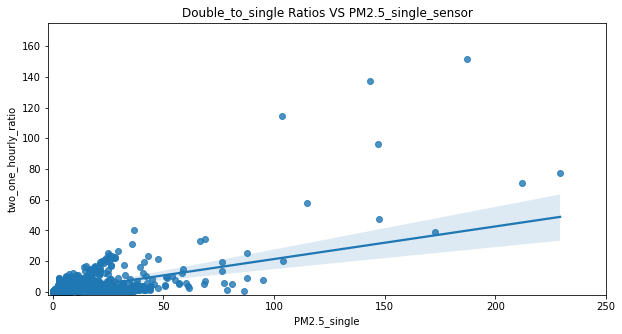

In [ ]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.regplot(data=one_two_hourly_merge, x='PM2.5_A', y='two_one_hourly_ratio')

axes.set_title('Double_to_single Ratios VS PM2.5_single_sensor')
axes.set_xlim(-2, 250)
axes.set_ylim(-2, 175)
axes.set_xlabel('PM2.5_single')

In [ ]:
bins = np.linspace(0, 200, 11)
ratio_mean = []
ratio_median = []
bin_space = []
n = []
for i in range(len(bins)-1):
  #print(bins[i:i+2])
  x = bins[i:i+2][0]
  y = bins[i:i+2][1]
  bin_space.append((x, y))
  ratio_mean.append(one_two_hourly_merge[(one_two_hourly_merge['PM2.5_A']<=y) & (one_two_hourly_merge['PM2.5_A']>x)]['two_one_hourly_ratio'].mean())
  ratio_median.append(one_two_hourly_merge[(one_two_hourly_merge['PM2.5_A']<=y) & (one_two_hourly_merge['PM2.5_A']>x)]['two_one_hourly_ratio'].median())
  n.append(one_two_hourly_merge[(one_two_hourly_merge['PM2.5_A']<=y) & (one_two_hourly_merge['PM2.5_A']>x)]['two_one_hourly_ratio'].count())

In [ ]:
pd.DataFrame({'PM2.5_ranges':bin_space, 'mean_ratio':ratio_mean, 'median_ratio':ratio_median, 'n':n})

,PM2.5_ranges,mean_ratio,median_ratio,n
0,"(0.0, 20.0)",1.003257,0.887845,35333
1,"(20.0, 40.0)",2.989441,0.971594,426
2,"(40.0, 60.0)",7.271357,4.928798,30
3,"(60.0, 80.0)",11.879360,5.545972,11
4,"(80.0, 100.0)",9.600090,7.969413,5
5,"(100.0, 120.0)",64.056606,57.922356,3
6,"(120.0, 140.0)",NaN,NaN,0
7,"(140.0, 160.0)",93.644605,96.546480,3
8,"(160.0, 180.0)",39.258860,39.258860,1
9,"(180.0, 200.0)",151.735711,151.735711,1


In [ ]:
one.head()

,sensor_index,longitude,latitude,County,State,Zip,datetime,PM2.5_A,datetime_new,date,time,weekofyear,year
1,1558,-118.4046,34.0218,Los Angeles County,California,90034,42863.0000,1.157305,2017-05-08 00:00:00,2017-05-08,00:00:00,19,2017
2,1558,-118.4046,34.0218,Los Angeles County,California,90034,42863.0417,0.975991,2017-05-08 01:00:00,2017-05-08,01:00:00,19,2017
3,1558,-118.4046,34.0218,Los Angeles County,California,90034,42863.0833,0.958201,2017-05-08 02:00:00,2017-05-08,02:00:00,19,2017
4,1558,-118.4046,34.0218,Los Angeles County,California,90034,42863.1250,1.156230,2017-05-08 03:00:00,2017-05-08,03:00:00,19,2017
5,1558,-118.4046,34.0218,Los Angeles County,California,90034,42863.1667,1.022382,2017-05-08 04:00:00,2017-05-08,04:00:00,19,2017


### Wildfire

In [ ]:
one.head()

,sensor_index,longitude,latitude,County,State,Zip,datetime,PM2.5_A,datetime_new,date,time,weekofyear,year
1,1558,-118.4046,34.0218,Los Angeles County,California,90034,42863.0000,1.157305,2017-05-08 00:00:00,2017-05-08,00:00:00,19,2017
2,1558,-118.4046,34.0218,Los Angeles County,California,90034,42863.0417,0.975991,2017-05-08 01:00:00,2017-05-08,01:00:00,19,2017
3,1558,-118.4046,34.0218,Los Angeles County,California,90034,42863.0833,0.958201,2017-05-08 02:00:00,2017-05-08,02:00:00,19,2017
4,1558,-118.4046,34.0218,Los Angeles County,California,90034,42863.1250,1.156230,2017-05-08 03:00:00,2017-05-08,03:00:00,19,2017
5,1558,-118.4046,34.0218,Los Angeles County,California,90034,42863.1667,1.022382,2017-05-08 04:00:00,2017-05-08,04:00:00,19,2017


In [ ]:
one_scu = one[(one['County'].isin(['Santa Clara County', 'Alameda County', 'Contra Costa County', 'San Joaquin County', 'Stanislaus County'])) & (one['date']==date(2020,8,19))]

In [ ]:
one_SCU['sensor_index'].nunique()

172

In [ ]:
one_SCU['PM2.5_A'].describe()

count    3490.000000
mean       15.309204
std        22.934037
min         0.041153
25%         3.023399
50%         7.326576
75%        17.987275
max       435.069394
Name: PM2.5_A, dtype: float64

In [ ]:
two_scu = two[(two['County'].isin(['Santa Clara County', 'Alameda County', 'Contra Costa County', 'San Joaquin County', 'Stanislaus County'])) & (two['date']==date(2020,8,18))]

In [ ]:
two_SCU['sensor_index'].nunique()

75

In [ ]:
two_SCU['PM2.5'].describe()

count    1701.000000
mean        6.875856
std        18.833926
min         0.000045
25%         2.010442
50%         3.256854
75%         4.917341
max       270.234256
Name: PM2.5, dtype: float64

one_SCU.merge(two_SCU, how='

In [ ]:
one_scu.groupby('time').agg({'PM2.5_A':['mean', 'median']})

PM2.5_A           
               mean     median
time                          
00:00:00  12.305956   3.435339
01:00:00  11.727449   3.989928
02:00:00  12.820119   4.262094
03:00:00  13.297479   5.013884
04:00:00  14.116273   5.214854
05:00:00  14.074079   6.299522
06:00:00  14.310595   7.509551
07:00:00  14.881408   8.645712
08:00:00  14.880143   8.217921
09:00:00  14.435326   8.552245
10:00:00  17.093205  10.305155
11:00:00  19.491156  12.195453
12:00:00  24.203940  14.379670
13:00:00  19.832849  11.396805
14:00:00  16.270291   8.885447
15:00:00  17.287180   9.104859
16:00:00  13.892181   7.450864
17:00:00  11.581669   5.262365
18:00:00  11.043479   4.349462
19:00:00  10.148692   4.367747
20:00:00   9.796129   4.204250
21:00:00   9.429151   5.150911
22:00:00   9.005565   4.229671
23:00:00   8.943360   5.112905

In [ ]:
two_scu.groupby('time').agg({'PM2.5':['mean', 'median']})

PM2.5          
               mean    median
time                         
00:00:00   3.423332  2.851487
01:00:00   3.572393  2.881074
02:00:00   3.494005  2.816255
03:00:00   3.572174  2.856849
04:00:00   3.490392  2.726005
05:00:00   3.773510  2.650199
06:00:00   4.008861  2.971194
07:00:00   4.197995  3.102750
08:00:00   3.992519  3.054304
09:00:00   4.167825  3.122561
10:00:00   4.466499  3.389040
11:00:00   4.749168  3.398045
12:00:00   5.301944  3.489444
13:00:00   5.014083  3.655227
14:00:00   4.583126  4.019305
15:00:00   4.851601  3.656906
16:00:00   3.608575  2.990142
17:00:00   3.670312  2.670771
18:00:00   3.314959  2.572300
19:00:00   5.195438  3.144306
20:00:00  11.967019  4.090227
21:00:00  18.193338  4.418212
22:00:00  20.619700  4.547411
23:00:00  20.462824  4.466164